# **LOGISTIC REGRESSION**

## 1.Data Exploration:

## **a. Load the dataset and perform exploratory data analysis (EDA).**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, roc_curve

In [ ]:
train = pd.read_csv("/content/Titanic_train.csv")

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.shape

(891, 12)

In [ ]:
train.sample(891)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
295,296,0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S
572,573,1,1,"Flynn, Mr. John Irwin (""Irving"")",male,36.0,0,0,PC 17474,26.3875,E25,S
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S
83,84,0,1,"Carrau, Mr. Francisco M",male,28.0,0,0,113059,47.1000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
785,786,0,3,"Harmer, Mr. Abraham (David Lishin)",male,25.0,0,0,374887,7.2500,NaN,S
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S


## **b.Examine the features, their types, and summary statistics.**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Dropping 'Cabin' column
train.drop(['Cabin'],axis=1,inplace=True)

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# For 'Age', we can fill missing values with the mean
train["Age"].fillna(train["Age"].mean(),inplace = True)

In [ ]:
train["Embarked"].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
# For 'Embarked', we can fill missing values with the most frequent value 'S'
train["Embarked"].fillna("S",inplace = True)

In [ ]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# Data Analysis

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train["Survived"].value_counts()

,count
Survived,
0,549
1,342


## **c.Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.**

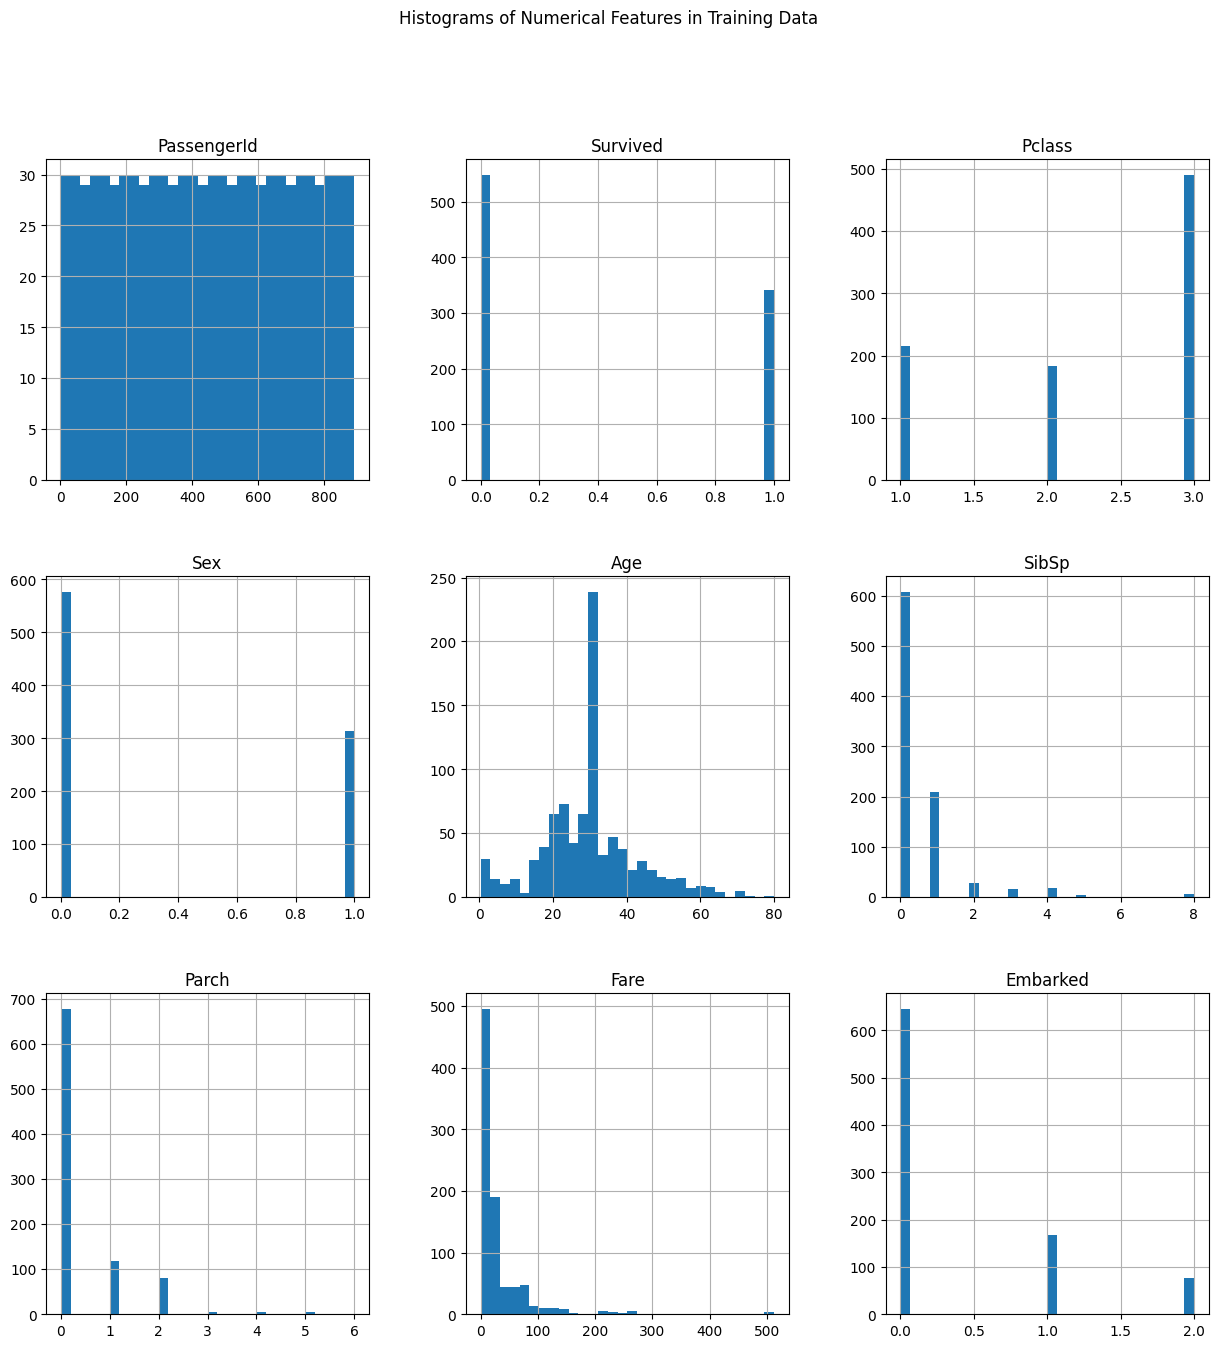

In [ ]:
train.hist(bins=30, figsize=(15,15))
plt.suptitle('Histograms of Numerical Features in Training Data')
plt.show()

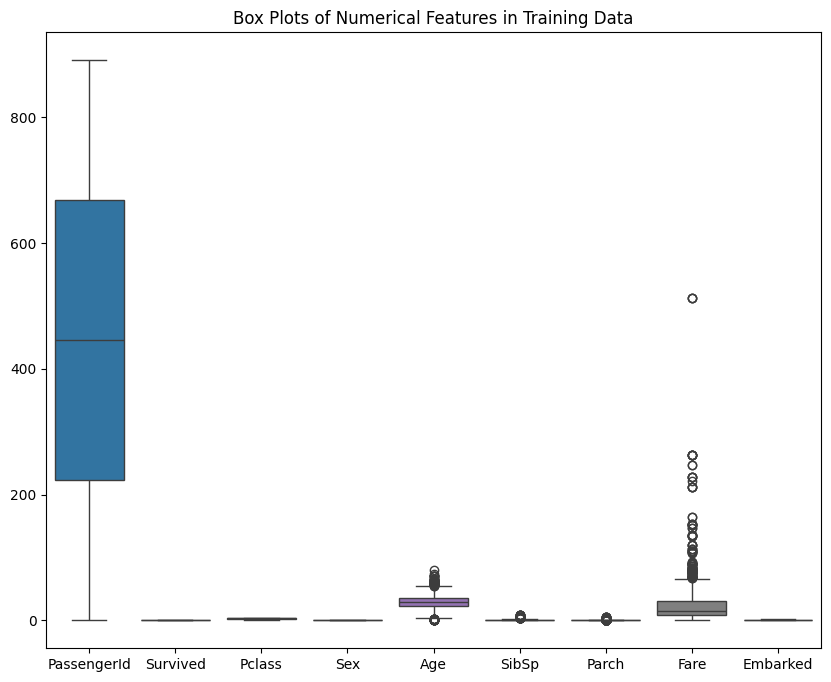

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=train.select_dtypes(include=[np.number]))
plt.title('Box Plots of Numerical Features in Training Data')
plt.show()

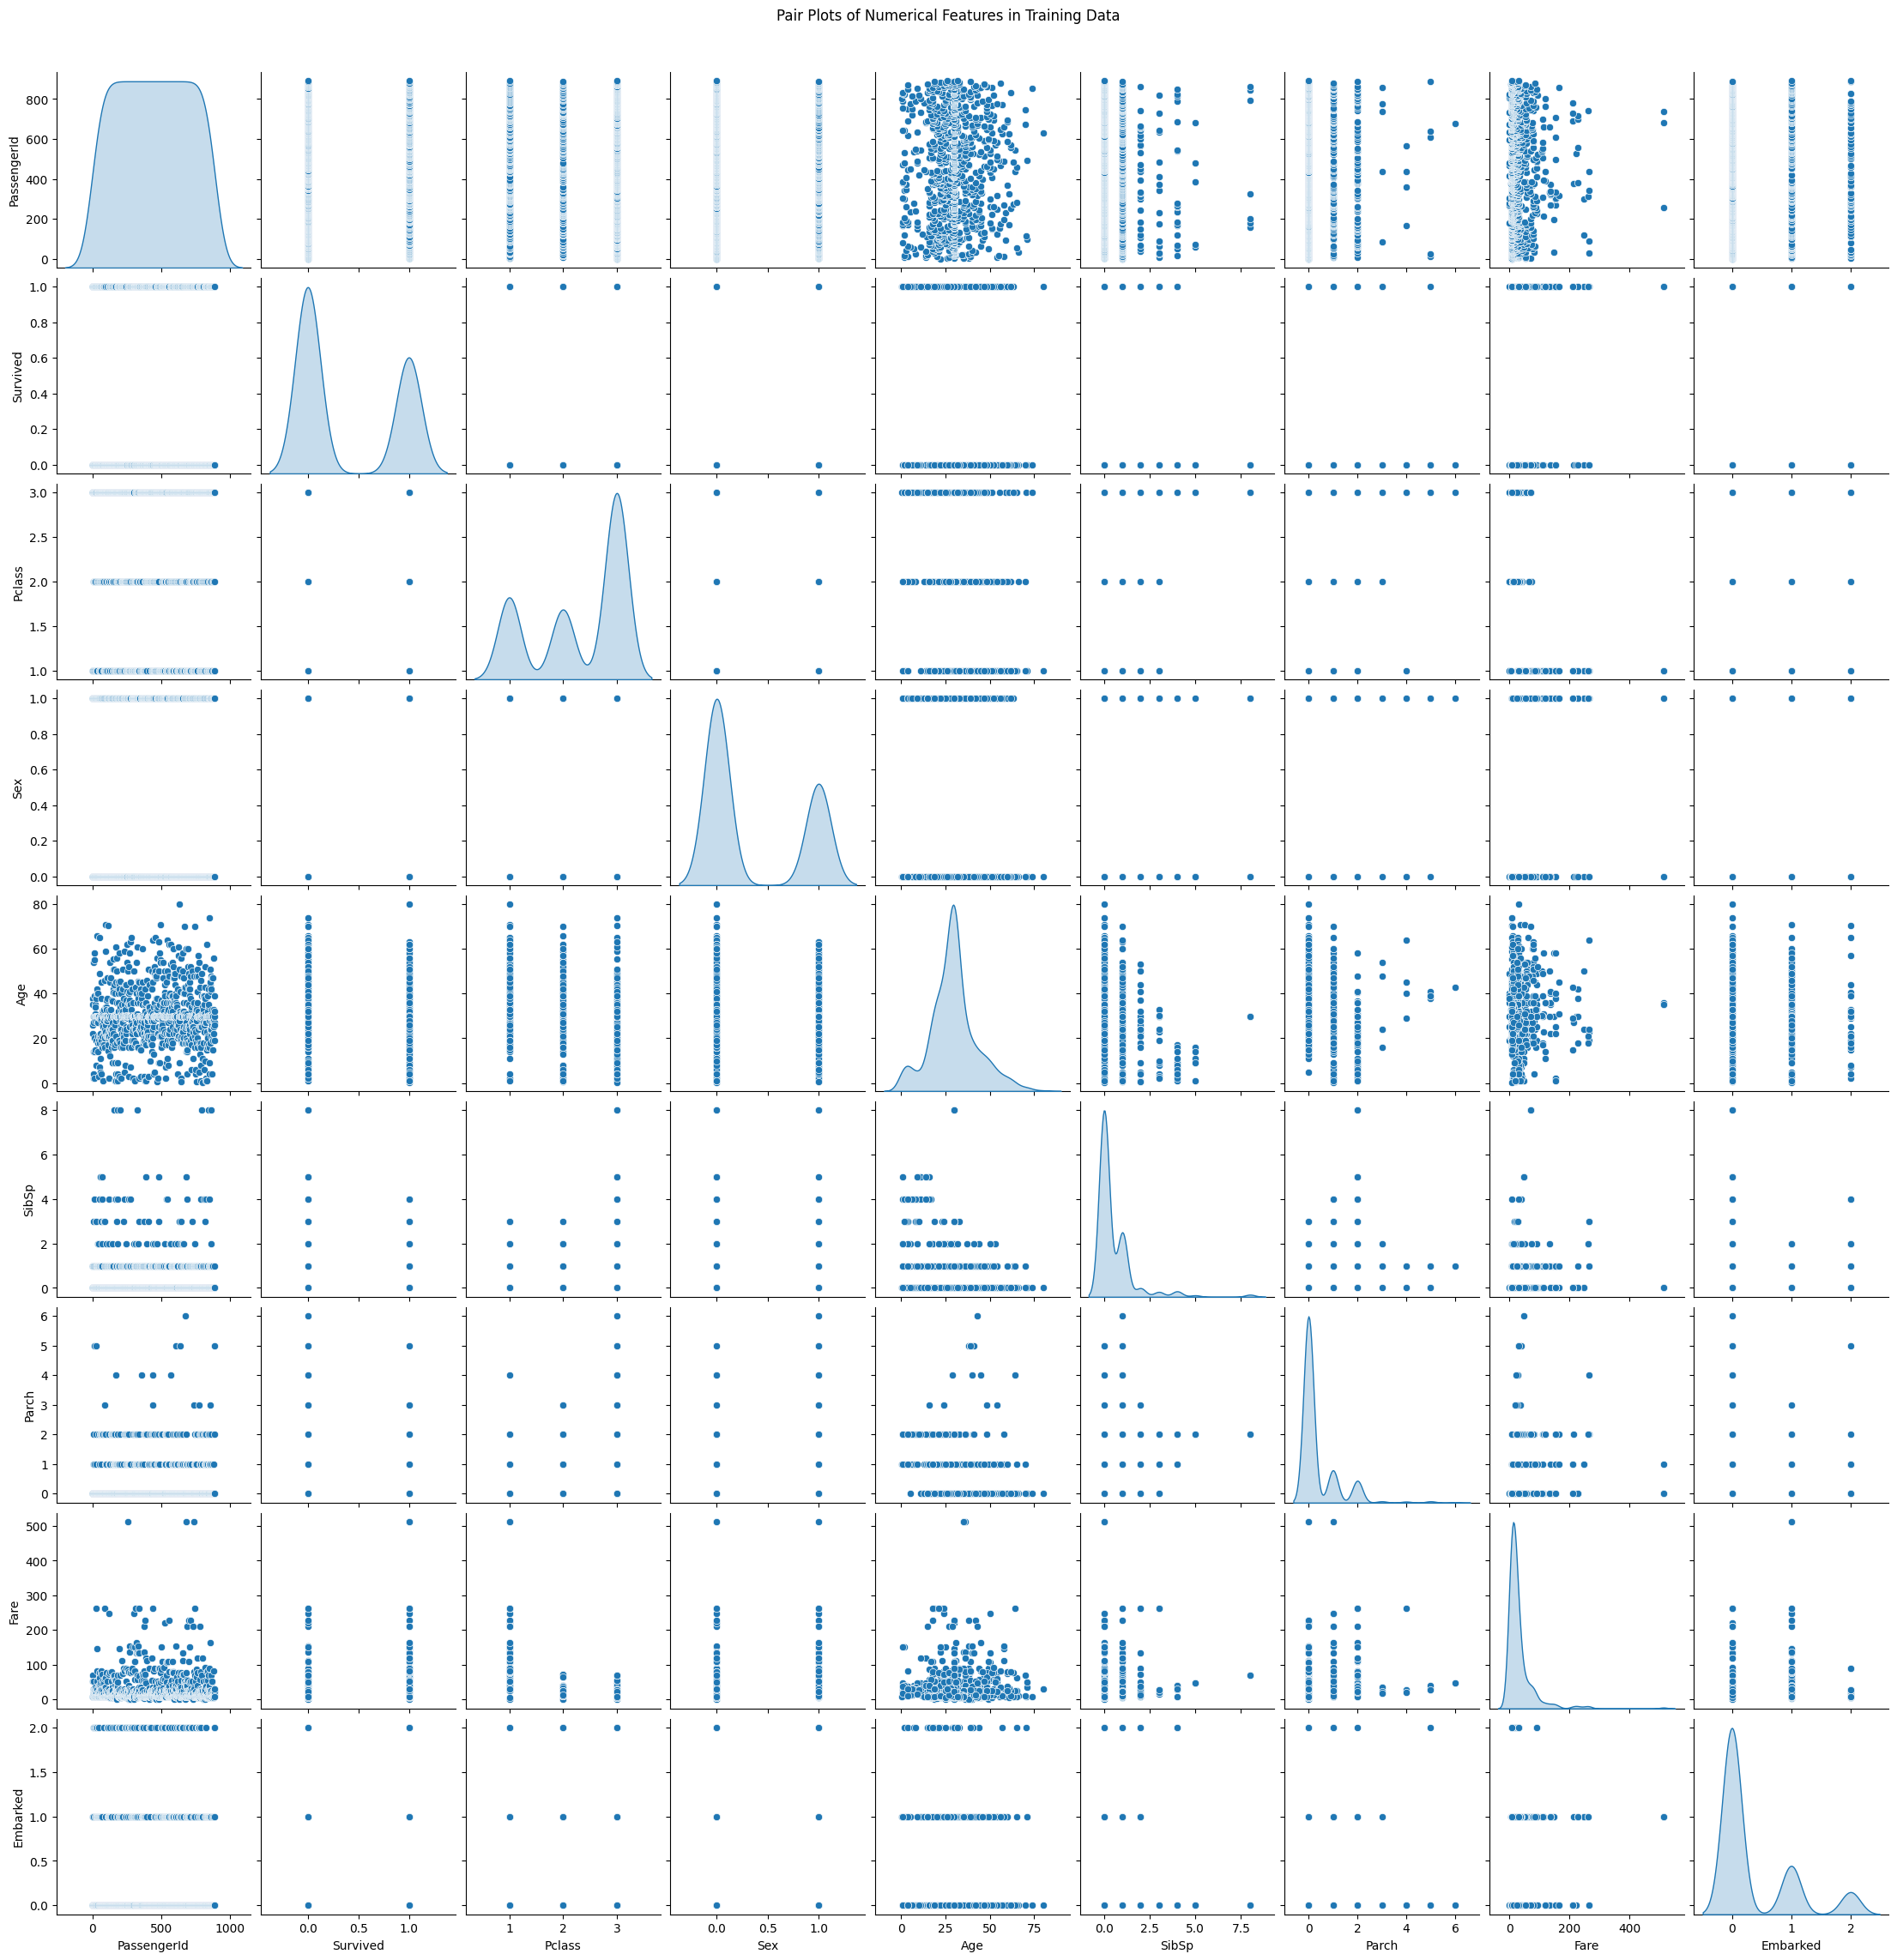

In [ ]:
sns.pairplot(train.select_dtypes(include=[np.number]), diag_kind='kde')
plt.suptitle('Pair Plots of Numerical Features in Training Data', y=1.02)
plt.show()

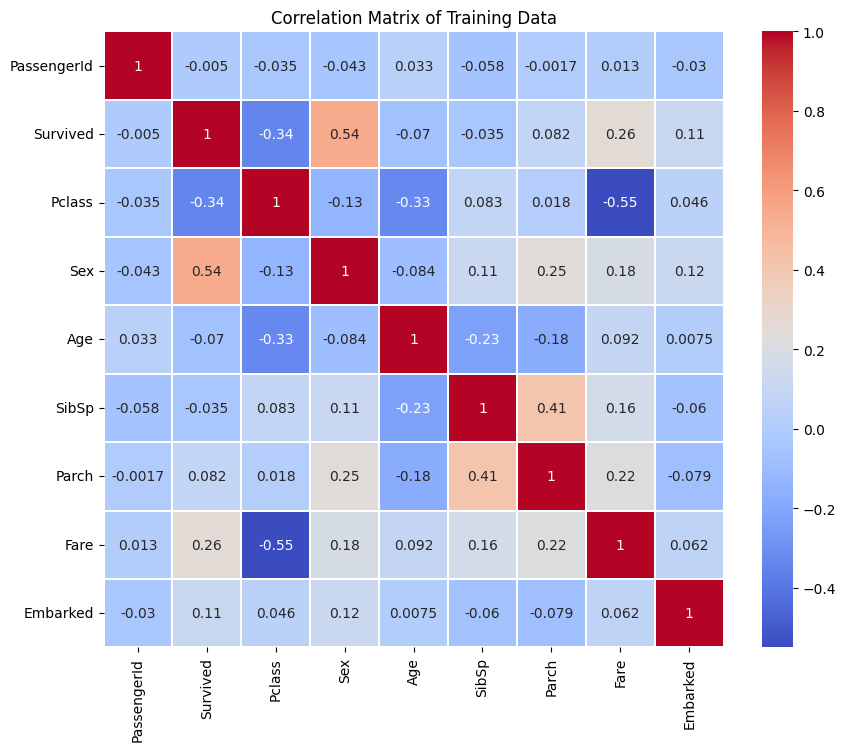

In [ ]:
plt.figure(figsize=(10,8))
numeric_cols_train = train.select_dtypes(include=[np.number])
correlation_matrix_train = numeric_cols_train.corr()
sns.heatmap(correlation_matrix_train, annot=True, cmap='coolwarm', linewidths=0.2)
plt.title('Correlation Matrix of Training Data')
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

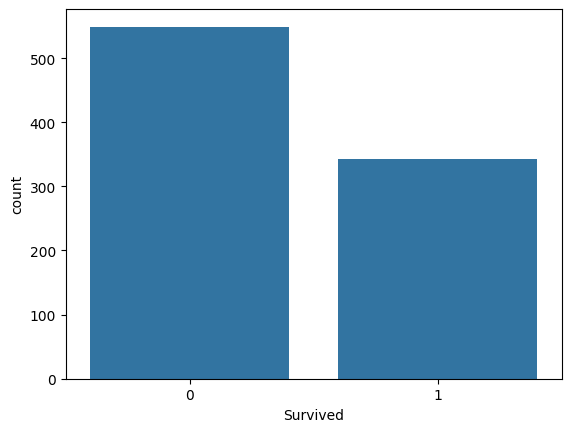

In [ ]:
sns.countplot(x="Survived",data=train)

<Axes: xlabel='Sex', ylabel='count'>

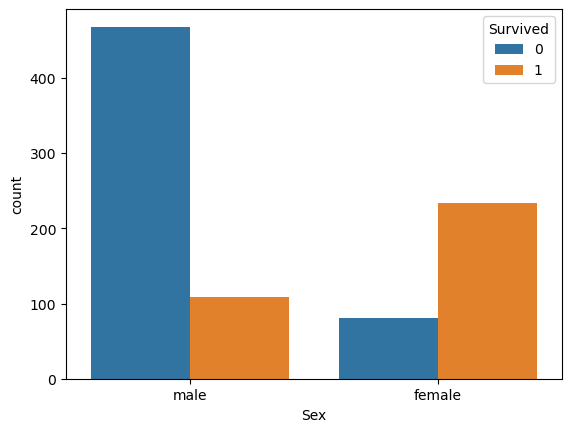

In [ ]:
sns.countplot(x="Sex",hue='Survived',data=train)

<Axes: xlabel='Pclass', ylabel='count'>

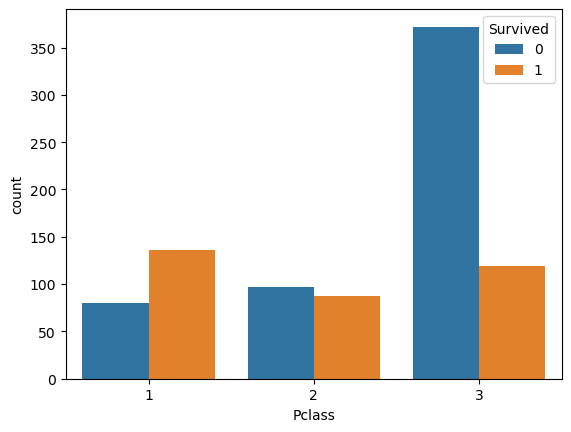

In [ ]:
sns.countplot(x="Pclass",hue='Survived',data=train)

<Axes: xlabel='Embarked', ylabel='count'>

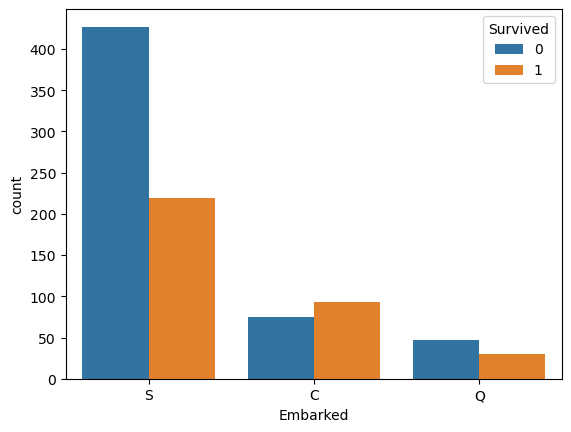

In [ ]:
sns.countplot(x="Embarked",hue='Survived',data=train)

##2.Data Preprocessing:

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [ ]:
train["Sex"].value_counts()

,count
Sex,
male,577
female,314


In [ ]:
train["Embarked"].value_counts()

,count
Embarked,
S,646
C,168
Q,77


## **a. Handle missing values (e.g., imputation).**

In [ ]:
train.replace({"Sex":{"male":0,"female":1},
              "Embarked":{"S":0,"C":1,"Q":2}},inplace = True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


## **b. Encode categorical variables.**

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1


In [ ]:
X = train.drop(["PassengerId","Survived","Name","Ticket"],axis = 1)
Y = train["Survived"]

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [ ]:
Y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


##3. Model Building:

## **a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).**

In [ ]:
!pip install scikit-learn

In [ ]:
x_train,x_test,y_train,y_test = tts(X,Y,test_size = 0.25,random_state = 42)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(668, 7) (223, 7) (668,) (223,)


In [ ]:
model = LogisticRegression(max_iter=200)

In [ ]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=200)

# 4.Model Evaluation

## **a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.**

In [ ]:
x_train_prediction = model.predict(x_train)
x_train_prediction

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,

In [ ]:
accuracy_train = accuracy_score(y_train,x_train_prediction)
accuracy_train

0.7964071856287425

In [ ]:
x_test_prediction = model.predict(x_test)
x_test_prediction

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0])

In [ ]:
accuracy_test = accuracy_score(y_test,x_test_prediction)
accuracy_test

0.7982062780269058

In [ ]:
print("Accuracy:",accuracy_score(y_test,x_test_prediction))
print("Precision:",precision_score(y_test,x_test_prediction))
print("Recall:",recall_score(y_test,x_test_prediction))
print("F1 Score:",f1_score(y_test,x_test_prediction))
print("ROC AUC Score:",roc_auc_score(y_test,x_test_prediction))

Accuracy: 0.7982062780269058
Precision: 0.7619047619047619
Recall:' 0.7191011235955056
F1 Score:' 0.7398843930635838
ROC AUC Score:' 0.784923696126111


## **b.Visualize the ROC curve.**

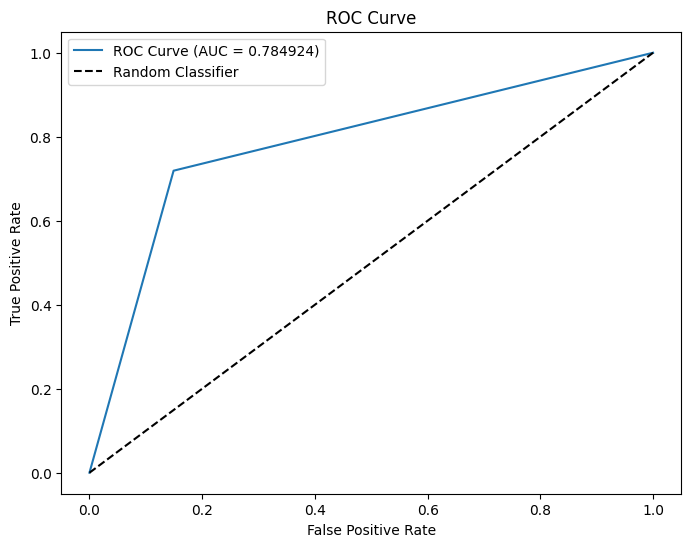

In [ ]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, x_test_prediction)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label = f"ROC Curve (AUC = {roc_auc:4f})")
plt.plot([0,1],[0,1],"k--",label = "Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 5.Interpretation:

In [ ]:
# Extract and interpret coefficients
coefficients = model.coef_[0]
features = x_train.columns

In [ ]:
coefficients_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coefficients_df

,Feature,Coefficient
0,Pclass,-0.960046
1,Sex,2.548258
2,Age,-0.034332
3,SibSp,-0.277592
4,Parch,-0.113908
5,Fare,0.003703
6,Embarked,0.240911


In [ ]:
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)
print(coefficients_df)

    Feature  Coefficient
1       Sex     2.548258
6  Embarked     0.240911
5      Fare     0.003703
2       Age    -0.034332
4     Parch    -0.113908
3     SibSp    -0.277592
0    Pclass    -0.960046


### a. Interpret the coefficients of the logistic regression model.

**Positive Coefficients:** Features with positive coefficients increase the probability of survival when their values increase.

**Negative Coefficients:** Features with negative coefficients decrease the probability of survival when their values increase.

**Magnitude of Coefficients:** The larger the magnitude (absolute value) of a coefficient, the stronger its influence on the probability of survival.

### b. Discuss the significance of features in predicting the target variable (survival probability in this case).

**Sex_male**: This feature typically has a negative coefficient, indicating that being male decreases the probability of survival, which aligns with historical accounts where women were given priority during evacuation.

**Pclass**: Higher classes (lower numerical value) often have a positive coefficient, indicating higher survival probability for passengers in first or second class compared to third class.

**Age**: Age can have varying coefficients. Generally, younger passengers might have higher survival rates.

**Fare**: A positive coefficient for Fare indicates that passengers who paid higher fares had a higher chance of survival, possibly due to being in better cabins or having better access to lifeboats.

**Embarked**: The port of embarkation can influence survival probabilities. For instance, passengers embarking from certain ports might have had better access to lifeboats.

## **6. Deployment with Streamlit:**

## In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share.Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions.

In [ ]:
!pip install pickle5

     -------------------------------------- 132.1/132.1 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pickle5
Failed to build pickle5
  Running setup.py install for pickle5: started
  Running setup.py install for pickle5: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [17 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-310
  creating build\lib.win-amd64-cpython-310\pickle5
  copying pickle5\pickle.py -> build\lib.win-amd64-cpython-310\pickle5
  copying pickle5\pickletools.py -> build\lib.win-amd64-cpython-310\pickle5
  copying pickle5\__init__.py -> build\lib.win-amd64-cpython-310\pickle5
  creating build\lib.win-amd64-cpython-310\pickle5\test
  copying pickle5\test\pickletester.py -> build\lib.win-amd64-cpython-310\pickle5\test
  copying pickle5\test\test_pickle.py -> build\lib.win-amd64-cpython-310\pickle5\test
  copying pickle5\test\test_picklebuffer.py -> build\lib.win-amd64-cpython-310\pickle5\test
  copying pickle5\test\__init__.py -> build\lib.win-amd64-cpython-310\pickle5\test
  running build_ext
  building 'pickle5._pickle' extension
  error: Mi

In [ ]:
import pickle

In [ ]:
with open("model.pkl","wb") as f:
    pickle.dump(model,f)

In [ ]:
with open("model.pkl","rb") as f:
    loaded_model = pickle.load(f)

In [ ]:
loaded_model.predict([[3,0,22,1,0,7,0]])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

## **Interview Questions**

## **1. What is the difference between precision and recall?**

## Precision

**Precision measures how many of the predictions you made for a specific class were actually correct.**

## Recall

**Recall measures how many of the actual positive cases your model was able to correctly identify.**

## Difference Between Precision And Recall

## **Precision focuses on the accuracy of the positive predictions: How many of the positive predictions were actually correct.**

## **Recall focuses on capturing all the actual positive cases: How many of the real positive cases were identified by the model.**

## **2. What is cross-validation, and why is it important in binary classification?**

## In cross-validation, you split your dataset into multiple parts or "folds" to test how well your model performs on different sets of data.

## Why is Cross-Validation Important in Binary Classification (like Logistic Regression)?

Prevents Overfitting: Overfitting happens when your model learns the training data too well, including its noise or randomness, and doesn't perform well on new data. Cross-validation helps detect overfitting by testing the model on different sets of data.

More Reliable Results: Instead of just testing your model on one part of the data, cross-validation tests it on multiple parts. This gives you a better idea of how well your model will do on completely new data.

Makes the Most of Your Data: Cross-validation uses all the data for both training and testing. This means you get to use your entire dataset efficiently, which is helpful if you have limited data.

Reduces Bias in Model Evaluation: It ensures that the model's performance isn't based on just one lucky or unlucky split of the data. By using multiple splits, you get a more accurate assessment of how well the model will do in real-life situations.